In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../Titanic/train.csv')
test = pd.read_csv('../Titanic/test.csv')
asw = pd.read_csv('../Titanic/complete.csv')
asw.columns = ['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'boat', 'body', 'home.dest']

**Verificando Valores nulos**

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Extraindo Iniciais dos Nomes para fazer inferência da Idade**

In [5]:
tables = [data,asw,test]
def abstract_initials(data):
    data['Initial']=0
    for i in data:
        data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    return data

tables = [abstract_initials(t) for t in tables] 

In [6]:
pd.crosstab(tables[0].Initial,tables[0].Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


**Agrupando os títulos**

In [7]:
titles = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona']
replace = ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Miss']

In [8]:
[t['Initial'].replace(titles,replace,inplace=True) for t in tables] 

[None, None, None]

**Atribuindo idade através do título**

In [9]:
def age_from_title(data):
    mean_ages = data.groupby('Initial')['Age'].mean()
    null_ages = data.Age.isnull()
    initials = data['Initial'].unique()
    for ini in initials:    
        data.loc[ ( null_ages ) & ( data.Initial == ini ), "Age" ] = round(mean_ages[ini])
    return data                                                                      

In [10]:
tables = [age_from_title(t) for t in tables]

**Verificando se todos os passageiro receberam valor da idade**

In [11]:
[t.Age.isnull().any() for t in tables]

[False, False, False]

**Imputando valores para as entradas sem dado de Porto de Embarque**

In [12]:
data.groupby(['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [13]:
test.groupby(['Embarked'])['Embarked'].count()

Embarked
C    102
Q     46
S    270
Name: Embarked, dtype: int64

In [14]:
for t in tables:
    t.loc[t["Embarked"].isna(),"Embarked"] = 'S'

In [15]:
[t.Embarked.isnull().any() for t in tables]

[False, False, False]

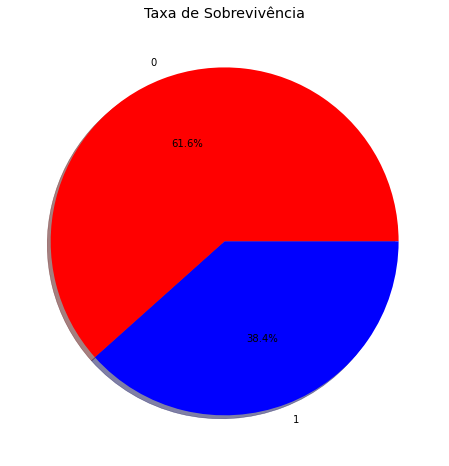

In [16]:
f,ax=plt.subplots(1,1,figsize=(18,8))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,shadow=True,colors=['red','blue'])
ax.set_title('Taxa de Sobrevivência')
ax.set_ylabel('')
plt.show()

In [17]:
tables[0].groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

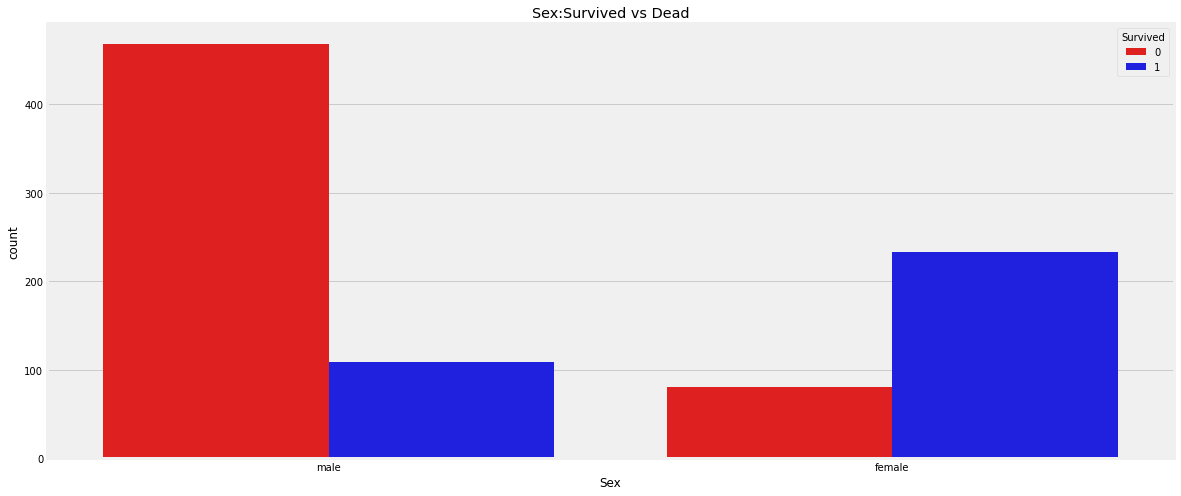

In [18]:
f,ax=plt.subplots(1,1,figsize=(18,8))
ax.set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax,palette=['red','blue'])
ax.set_title('Sex:Survived vs Dead')
plt.show()

**Sobreviventes por Classe**

In [19]:
pd.crosstab(tables[0].Pclass,tables[0].Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


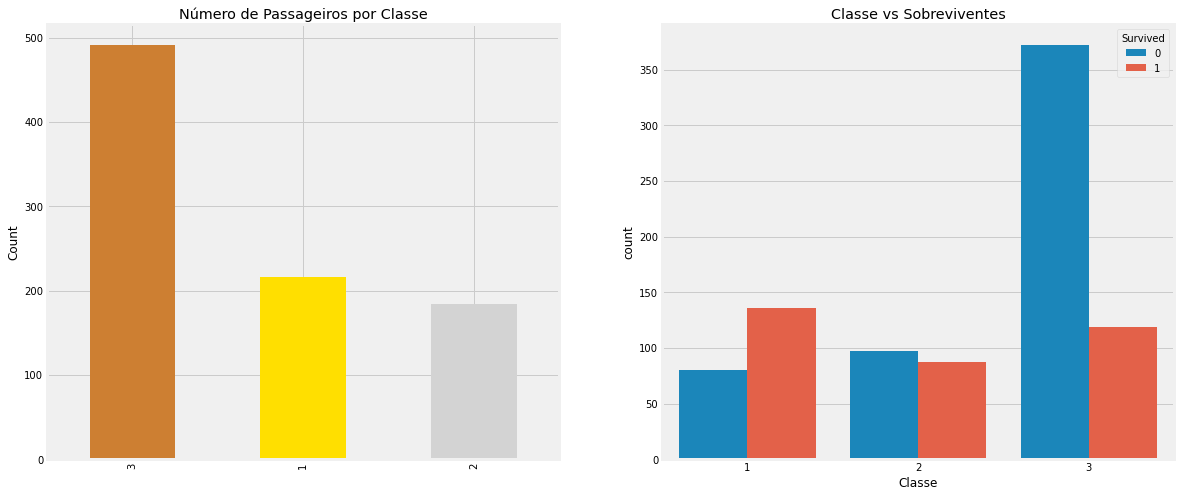

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Número de Passageiros por Classe')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Classe vs Sobreviventes')
ax[1].set_xlabel("Classe")
plt.show()

In [21]:
pd.crosstab([tables[0].Sex,tables[0].Survived],[tables[0].Pclass],margins=True).style.background_gradient(cmap='summer_r')

**Idade dos Passageiros**

In [22]:
print('Age Max:',data['Age'].max(),'Years')
print('Age Min:',data['Age'].min(),'Years')
print('Média  :',data['Age'].mean(),'Years')

Age Max: 80.0 Years
Age Min: 0.42 Years
Média  : 29.841941638608304 Years


**Sobrevivencia por idade**

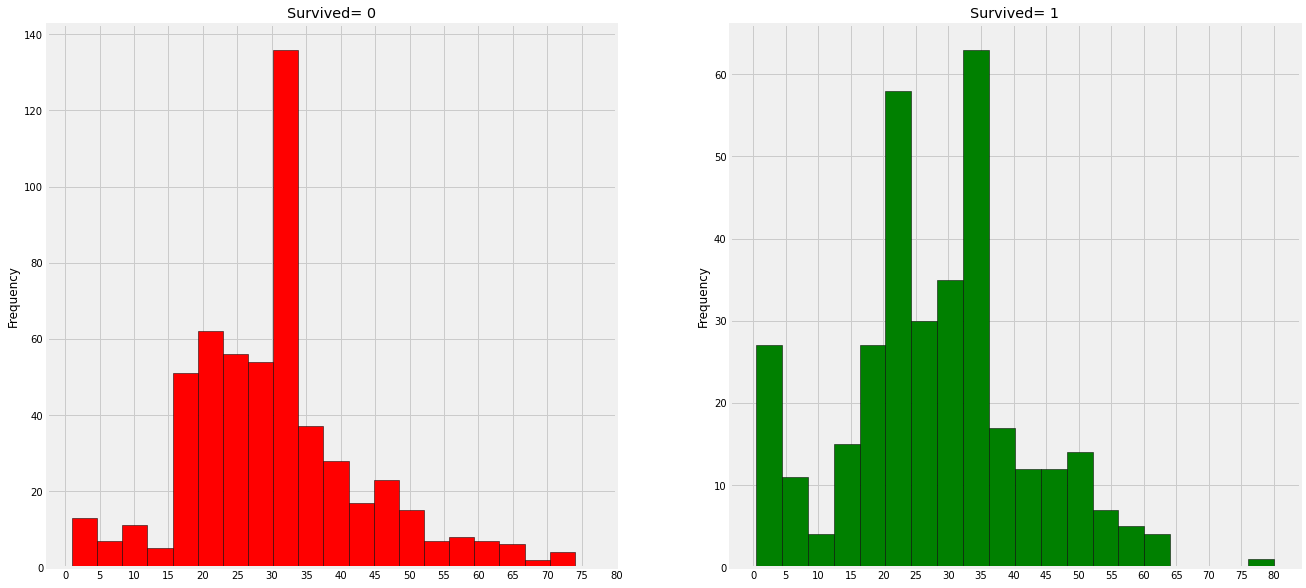

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Sobreviventes por Local de Embarque**

In [24]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

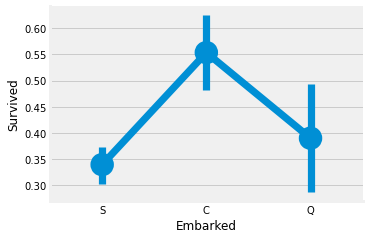

In [25]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

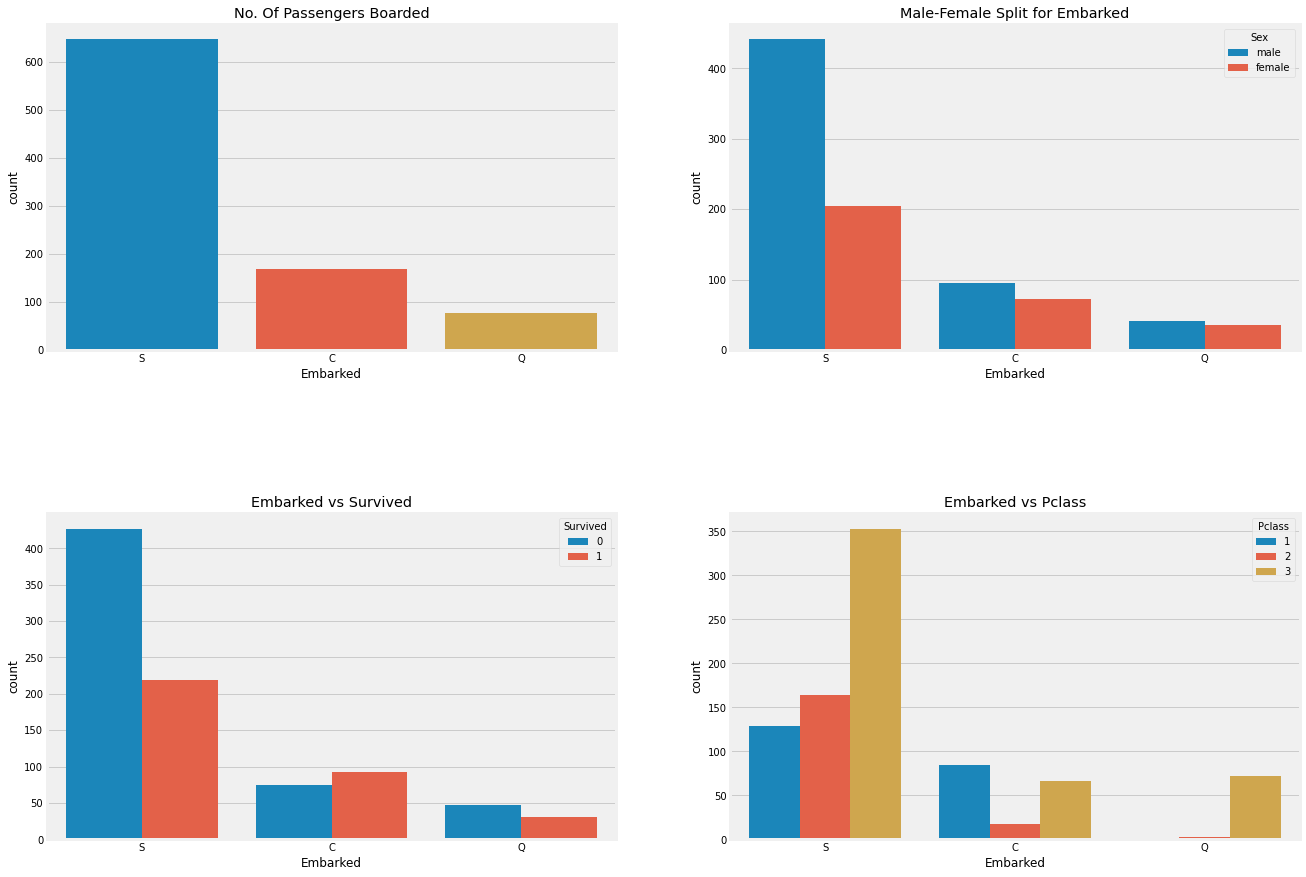

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Número de Acompanhantes - Irmãos ou Esposa**

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


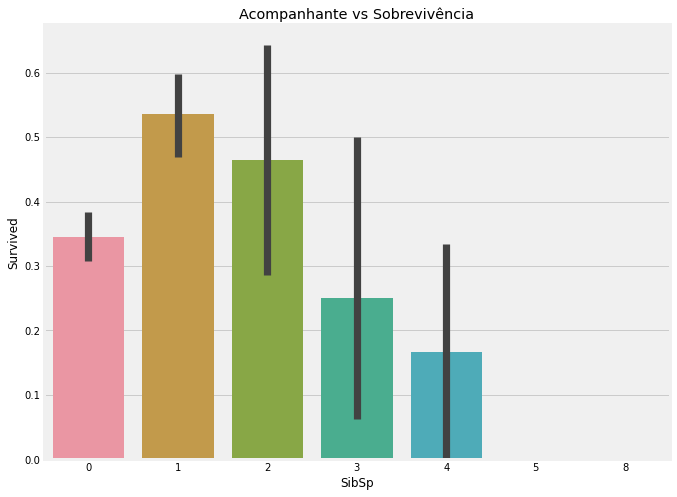

In [28]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.barplot('SibSp','Survived',data=data,ax=ax)
ax.set_title('Acompanhante vs Sobrevivência')
plt.show()

**Passageiro com acompanhante por Classe**

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Número de Acompanhantes - Pais ou Filhos**

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


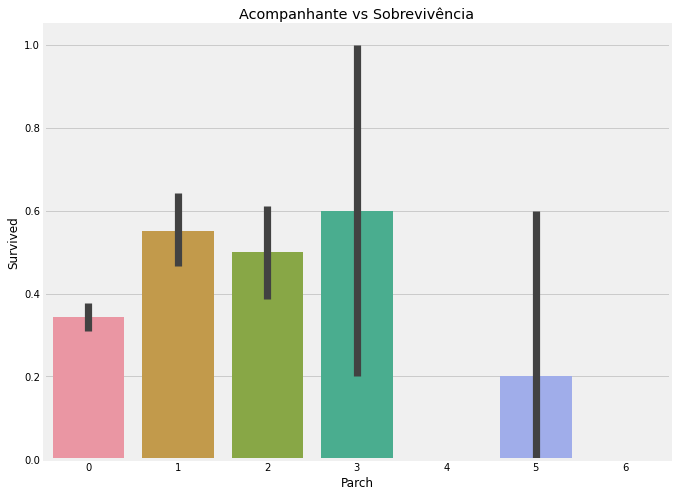

In [31]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.barplot('Parch','Survived',data=data,ax=ax)
ax.set_title('Acompanhante vs Sobrevivência')
plt.show()

**Juntando os Dados de Familia**

In [32]:
def family_size(data):    
    data['Family_Size']=0
    data['Family_Size']=data['Parch']+data['SibSp'] # tamanho da família
    data['Alone']=0
    data.loc[data.Family_Size==0,'Alone']= 1 #Alone
    return data
tables = [family_size(t) for t in tables]

In [33]:
pd.crosstab(data.Family_Size,[data.Pclass,data.Survived]).style.background_gradient(cmap='summer_r')

In [34]:
def poor_Alone_Die(data):
    data['Poor_Alone_Die'] = 0
    data.loc[(data['Family_Size'] == 0) & (data['Pclass'] == 3) & (data['Sex'] == 'male'),'Poor_Alone_Die']= 1
    data.loc[(data['Family_Size'] == 0) & (data['Pclass'] == 2) & (data['Sex'] == 'male'),'Poor_Alone_Die']= 1
    return data

tables = [poor_Alone_Die(t) for t in tables]

In [35]:
def rich_companion_live(data):
    data['Rich_Companion_Live'] = 0
    data.loc[(data['Family_Size'] == 1) & (data['Pclass'] == 1) & (data['Sex'] == 'female'),'Rich_Companion_Live']= 1
    return data
tables = [rich_companion_live(t) for t in tables]

**Ticket**

In [36]:
print('Ticket MAX:',data['Fare'].max())
print('Ticket MIN:',data['Fare'].min())
print('Ticket Média:',data['Fare'].mean())

Ticket MAX: 512.3292
Ticket MIN: 0.0
Ticket Média: 32.204207968574636


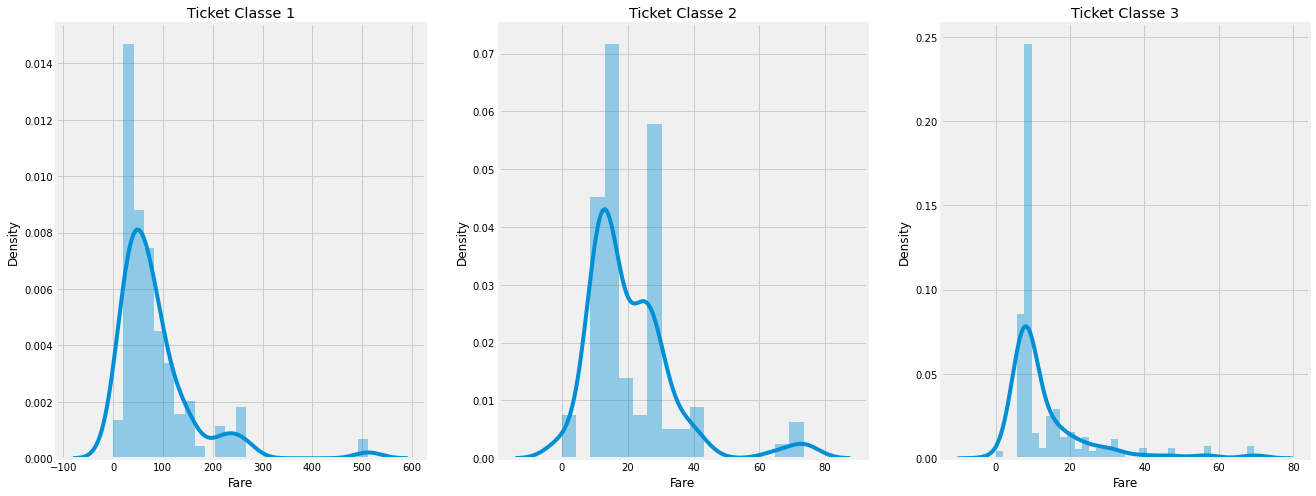

In [37]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Ticket Classe 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Ticket Classe 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Ticket Classe 3')
plt.show()

**Substituindo por valores numéricos**

In [38]:
def replace_string_values(data):
    data['Sex'].replace(['male','female'],[0,1],inplace=True )
    data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
    return data
tables = [replace_string_values(t) for t in tables]


**Distribuindo Fare em 4 Classes distintas**

In [39]:
test[test["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family_Size,Alone,Poor_Alone_Die,Rich_Companion_Live
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,0,1,1,0


In [40]:
test.groupby(["Pclass"])['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [41]:
for t in tables:
    t.loc[t["Fare"].isna() & t['Pclass'] == 1 ,"Fare"] = 94
    t.loc[t["Fare"].isna() & t['Pclass'] == 2 ,"Fare"] = 22
    t.loc[t["Fare"].isna() & t['Pclass'] == 3 ,"Fare"] = 12

In [42]:
[t.Fare.isna().any() for t in tables]

[False, False, False]

In [43]:
def set_fare_range(data):
    data['Fare_Range']=pd.qcut(data['Fare'],4)    
    return data
tables = [set_fare_range(t) for t in tables]

In [44]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


**Separando Ticket por Categoria**

In [45]:
def set_fare_category(data):
    data['Fare_cat']=0     
    data.loc[data['Fare']<=7.91,'Fare_cat']=1
    data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=2
    data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=3
    data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=4
    return data
tables = [set_fare_category(t) for t in tables]

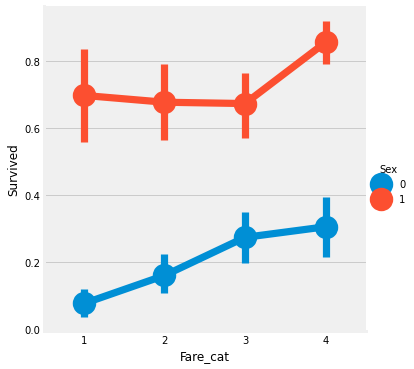

In [46]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

**Separando idades por grupos**

In [47]:
data.Age.max()

80.0

In [48]:
data.Age.min()

0.42

In [49]:
def set_age_band(data):     
    data['Age_band']=0    
    data.loc[data['Age']<=5,'Age_band'] = 0
    data.loc[(data['Age']> 5)&(data['Age']<=15),'Age_band'] = 1
    data.loc[(data['Age']>15)&(data['Age']<=20),'Age_band'] = 2
    data.loc[(data['Age']>20)&(data['Age']<=30),'Age_band'] = 3
    data.loc[(data['Age']>30)&(data['Age']<=40),'Age_band'] = 4
    data.loc[(data['Age']>40)&(data['Age']<=50),'Age_band'] = 5
    data.loc[data['Age']>50,'Age_band'] = 6
 
    
    return data
tables=[set_age_band(t) for t in tables]


In [50]:
tables[0]['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
4,292
3,266
2,96
5,86
6,64
0,48
1,39


In [51]:
pd.crosstab([tables[1].Age_band,tables[1].Survived],[tables[1].Sex,tables[1].Pclass],margins=True).style.background_gradient(cmap='summer_r')

In [52]:
def age_4_alone_die(data):
    data['age_4_alone_die'] = 0   
    data.loc[(data['Age_band'] == 4) & (data['Sex'] == 0) & (data['Pclass'] == 3),'age_4_alone_die']= 1
    return data
tables =[age_4_alone_die(t) for t in tables] 

In [53]:
def rich_woman_lives(data):
    data['rich_woman_lives'] = 0   
    data.loc[(data['Sex'] == 1) & (data['Pclass'] == 1),'rich_woman_lives']= 1
    return data
tables =[rich_woman_lives(t) for t in tables]

In [54]:
# def family_band(data):
#     data['family_band_A'] = 0   
#     data['family_band_B'] = 0   
#     data['family_band_C'] = 0       
#     data.loc[(data['Family_Size'] >=1) & (data['Family_Size'] < 3) ,'family_band_A']= 1
#     data.loc[(data['Family_Size'] >=3) & (data['Family_Size'] < 5),'family_band_B']= 1
#     data.loc[(data['Family_Size'] >=5) & (data['Family_Size'] < 11),'family_band_C']= 1
#     return data
# tables =[family_band(t) for t in tables]


In [55]:
drops_list = ['Name','Age','Cabin','Ticket','Fare','Fare_Range','Initial','Embarked','Parch','SibSp']
tables[0].drop(['PassengerId'],axis=1,inplace=True)
[t.drop(drops_list,axis=1,inplace=True) for t in tables]

[None, None, None]

In [56]:
tables[1].drop(['boat','home.dest','body'],axis=1,inplace=True)

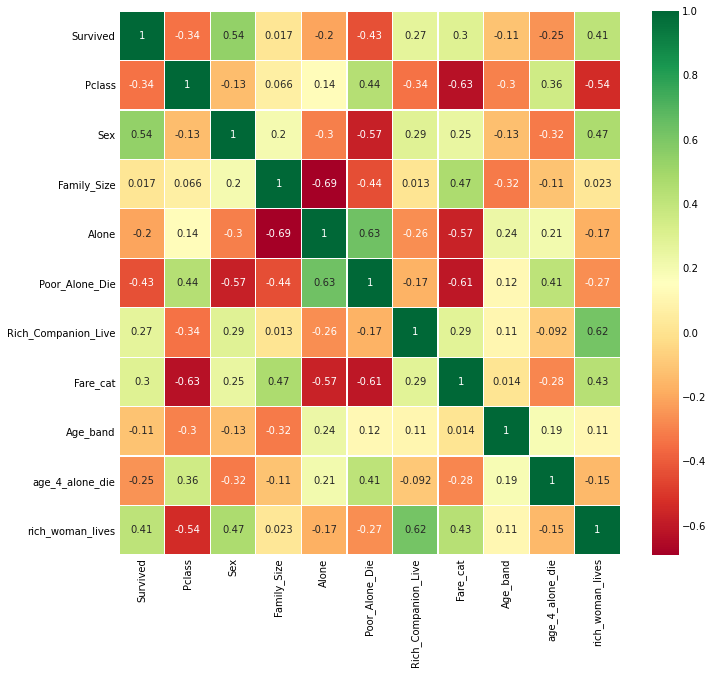

In [57]:
sns.heatmap(tables[0].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->matriz de correlação
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [58]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [59]:
train_split,test_split=train_test_split(tables[0],test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train_split[train_split.columns[1:]]
train_Y=train_split[train_split.columns[:1]]
test_X=test_split[test_split.columns[1:]]
test_Y=test_split[test_split.columns[:1]]
X=tables[0][tables[0].columns[1:]]
Y=tables[0]['Survived']

**Testando alguns modelos**

In [60]:
model= model=RandomForestClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão RandomForestClassifier ',
      metrics.accuracy_score(prediction,tables[1].Survived))

Precisão RandomForestClassifier  0.825057295645531


In [61]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão rbf SVM ',
      metrics.accuracy_score(prediction,tables[1].Survived))

Precisão rbf SVM  0.8181818181818182


In [62]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão KNN ',
         metrics.accuracy_score(prediction,tables[1].Survived))

Precisão KNN  0.8143621084797555


In [63]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão Logistic Regression ',
        metrics.accuracy_score(prediction,tables[1].Survived))

Precisão Logistic Regression  0.80061115355233


In [64]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão Decision Tree ',
      metrics.accuracy_score(prediction,tables[1].Survived))

Precisão Decision Tree  0.8181818181818182


In [65]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão linear SVM ',
        metrics.accuracy_score(prediction,tables[1].Survived))

Precisão linear SVM  0.7799847211611918


In [66]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction=model.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão NaiveBayes ',
      metrics.accuracy_score(prediction,tables[1].Survived))

Precisão NaiveBayes  0.7203972498090145


In [67]:
# f,ax=plt.subplots(3,3,figsize=(12,10))
# y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
# ax[0,0].set_title('Matrix for rbf-SVM')
# y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
# ax[0,1].set_title('Matrix for Linear-SVM')
# y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
# ax[0,2].set_title('Matrix for KNN')
# y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
# ax[1,0].set_title('Matrix for Random-Forests')
# y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
# ax[1,1].set_title('Matrix for Logistic Regression')
# y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
# ax[1,2].set_title('Matrix for Decision Tree')
# y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
# sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
# ax[2,0].set_title('Matrix for Naive Bayes')
# plt.subplots_adjust(hspace=0.2,wspace=0.2)
# plt.show()

**GridSearchCV**

In [68]:
#SVM
from sklearn.model_selection import GridSearchCV
best_estimators = []

In [69]:
#Random Florest
n_estimators=range(500,600,5)
max_depth = range(5,6)
hyper={'max_depth':max_depth,'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=False,n_jobs=-1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
best_estimators.append(("RFORTEST",gd.best_estimator_))

0.8293766869625259
RandomForestClassifier(max_depth=5, n_estimators=535, random_state=0)


In [70]:
#SVC
C=list(np.arange(0,1,0.1))
gamma= list(np.arange(0,1,0.1))
degree = list(range(0,6)) 
hyper={'C':C,'gamma':gamma, 'degree':degree}
gd=GridSearchCV(estimator=svm.SVC(kernel='rbf',probability=True),param_grid=hyper,verbose=1,n_jobs=-1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
best_estimators.append(("SVM_rbf",gd.best_estimator_))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
0.8316427091833531
SVC(C=0.4, degree=0, gamma=0.30000000000000004, probability=True)


In [71]:
#KNN
n_neighbors=range(0,30)
weights = ['uniform','distance'] 
hyper={'n_neighbors':n_neighbors,'weights':weights}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,verbose=False,n_jobs=-1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
best_estimators.append(("KNN",gd.best_estimator_))

0.8215617349821104
KNeighborsClassifier(n_neighbors=21)


In [72]:
#Xgboost
# from sklearn.model_selection import GridSearchCV

# import xgboost as xgb
# XGBModel = xgb.sklearn.XGBModel

# def XGBModel_score(y_true, y_pred):
#     y_pred[y_pred<0.5] = 0
#     y_pred[y_pred>=0.5] = 1
#     return metrics.accuracy_score(y_pred,y_true)
    
# scorer = metrics.make_scorer(XGBModel_score)   
# n_estimators = list(range(20))
# max_depth = list(range(5))
 
# hyper={'n_estimators':n_estimators,'max_depth':max_depth}    
     
# gd=GridSearchCV(estimator=xgb.sklearn.XGBModel( booster='gbtree'),param_grid=hyper,verbose=True,n_jobs=-1,scoring=scorer)
# gd.fit(X,Y)
# print(gd.best_score_)
# print(gd.best_estimator_)



In [73]:
from lightgbm import LGBMClassifier
num_leaves = range(1,7)
n_estimators = range(1,15)
learning_rate =list(np.arange(0,1,0.1))
hyper={'num_leaves':num_leaves,'n_estimators':n_estimators,'learning_rate':learning_rate}
def custom_score(y_true, y_pred):
    y_pred[y_pred<0.5] = 0
    y_pred[y_pred>=0.5] = 1
    return metrics.accuracy_score(y_pred,y_true)
    
scorer = metrics.make_scorer(custom_score)  
gd=GridSearchCV(estimator=LGBMClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
best_estimators.append(("LGBMClassifier",gd.best_estimator_))

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
0.8338710689849979
LGBMClassifier(learning_rate=0.4, n_estimators=14, num_leaves=4)


In [74]:
# model = svm.SVC(kernel='rbf',C=0.8, degree=0, gamma=0.8)
# # model = svm.SVC(kernel='linear',C=0.8, degree=0, gamma=0.8)
# model.fit(X,Y)
# prediction=model.predict(tables[1].drop(['Survived'],axis=1))
# print('Precisão svm ', metrics.accuracy_score(prediction,tables[1].Survived))
# test_frame = test.drop("PassengerId",axis=1)
# predict_test = model.predict(test_frame)
# predict_test[predict_test<0.5] = 0
# predict_test[predict_test>=0.5] = 1
# pred=pd.DataFrame(predict_test,columns=["Survived"])
# #Output
# outputdf=pd.concat([test["PassengerId"],pred],axis=1)
# outputdf['Survived'] = outputdf['Survived'].astype(int)
# outputdf.to_csv("submission.csv",index=False)

Precisão svm  0.8326967150496563

In [75]:
# model = svm.SVC(kernel='rbf',C=0.8, degree=0, gamma=0.8)
# drop_list = [ 'Rich_Companion_Live', ]
# X_important = X.copy().drop(drop_list,axis=1)
# # X_important = X.copy()
# model.fit(X_important,Y),
# table_dropped = tables[1].drop(['Survived'],axis=1)
# table_dropped = table_dropped.drop(drop_list,axis=1)
# prediction=model.predict(table_dropped)
# print('Precisão svm ', metrics.accuracy_score(prediction,tables[1].Survived))
# test_frame = test.copy().drop("PassengerId",axis=1)
# test_frame= test_frame.drop(drop_list,axis=1)
# predict_test = model.predict(test_frame)
# predict_test[predict_test<0.5] = 0
# predict_test[predict_test>=0.5] = 1
# pred=pd.DataFrame(predict_test,columns=["Survived"])
# #Output
# outputdf=pd.concat([test["PassengerId"],pred],axis=1)
# outputdf['Survived'] = outputdf['Survived'].astype(int)
# outputdf.to_csv("submission.csv",index=False)

VotingClassifier

In [76]:
from sklearn.ensemble import VotingClassifier

In [77]:
ensemble=VotingClassifier(estimators=best_estimators,voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble.score(test_X,test_Y))

The accuracy for ensembled model is: 0.8395522388059702


In [81]:
ensemble=VotingClassifier(estimators=best_estimators,voting='soft').fit(X,Y)

prediction=ensemble.predict(tables[1].drop(['Survived'],axis=1))
print('Precisão svm ', metrics.accuracy_score(prediction,tables[1].Survived))
test_frame = test.drop("PassengerId",axis=1)
predict_test = ensemble.predict(test_frame)
# predict_test[predict_test<0.5] = 0
# predict_test[predict_test>=0.5] = 1
pred=pd.DataFrame(predict_test,columns=["Survived"])
#Output
outputdf=pd.concat([test["PassengerId"],pred],axis=1)
outputdf['Survived'] = outputdf['Survived'].astype(int)
outputdf.to_csv("submission.csv",index=False)

Precisão svm  0.813598166539343
